In [23]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy import stats
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [24]:
#path to uber csv 

file="uber.csv"

#read into data
uber_df= pd.read_csv(file)
uber_df=uber_df.head(1000)


In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

pickup_lats=uber_df["pickup_latitude"]
pickup_lngs=uber_df["pickup_longitude"]
#lat_lngs=zip(pickup_lats,pickup_lngs)

uber_df["City"]="x"

for index, row in uber_df.iterrows():
    city=citipy.nearest_city(row["pickup_latitude"],row["pickup_longitude"]).city_name
    uber_df.loc[index,"City"]=city  
       
# Print the city count to confirm sufficient count
len(cities)
uber_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,new york
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,new york
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,new york
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,guttenberg
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,new york
...,...,...,...,...,...,...,...,...,...,...
995,13439193,2011-05-04 06:39:00.00000044,5.7,2011-05-04 06:39:00 UTC,-73.969720,40.757577,-73.953782,40.766960,1,guttenberg
996,32405310,2011-11-23 20:43:20.0000002,8.1,2011-11-23 20:43:20 UTC,-73.993784,40.757054,-73.980018,40.775632,3,weehawken
997,51612001,2010-01-11 20:58:00.00000035,8.5,2010-01-11 20:58:00 UTC,-73.972338,40.765078,-73.954527,40.783833,5,guttenberg
998,937243,2013-06-12 17:01:24.0000001,5.5,2013-06-12 17:01:24 UTC,-73.979054,40.784730,-73.982970,40.775048,1,guttenberg


In [26]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


In [27]:
#distance 

dropoff_lats=uber_df["pickup_longitude"]
dropoff_lngs=uber_df["pickup_longitude"]

uber_df["Distance"]=0

for index, row in uber_df.iterrows():
    distance=haversine(row["pickup_latitude"],row["pickup_longitude"],\
                       row["dropoff_latitude"], row["dropoff_longitude"],to_radians=True, earth_radius=6371)
    uber_df.loc[index,"Distance"]=distance  


In [28]:
#binning 

#set time of day bins
timeofday=[0, 5, 12, 17, 24]

uber_df.pickup_datetime= pd.to_datetime(uber_df.pickup_datetime)

#labels for bins
times=["Night","Morning","Afternoon","Evening"]

uber_df['Time of Day'] = pd.cut(uber_df.pickup_datetime.dt.hour, timeofday, labels=times, right=False)


In [29]:
#remove distance 0

uber_df_cleaned=uber_df.loc[uber_df["Distance"]!=0]

uber_df_cleaned

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City,Distance,Time of Day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,new york,1.683323,Evening
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,new york,2.457590,Evening
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,new york,5.036377,Evening
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,guttenberg,1.661683,Morning
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,new york,4.475450,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
995,13439193,2011-05-04 06:39:00.00000044,5.7,2011-05-04 06:39:00+00:00,-73.969720,40.757577,-73.953782,40.766960,1,guttenberg,1.700119,Morning
996,32405310,2011-11-23 20:43:20.0000002,8.1,2011-11-23 20:43:20+00:00,-73.993784,40.757054,-73.980018,40.775632,3,weehawken,2.368857,Evening
997,51612001,2010-01-11 20:58:00.00000035,8.5,2010-01-11 20:58:00+00:00,-73.972338,40.765078,-73.954527,40.783833,5,guttenberg,2.568764,Evening
998,937243,2013-06-12 17:01:24.0000001,5.5,2013-06-12 17:01:24+00:00,-73.979054,40.784730,-73.982970,40.775048,1,guttenberg,1.125950,Evening


In [30]:
# Most Popular Pick up times & how it correlates to price (plot, basic stats dataframe) -Neil 

# Rank by cities (fare amount paid, Total distances, Most popular time of day) -Rose 

# Where are the most popular pick up locations (map, dataframe) -Turgut 

# Price regression on number of passengers (plot, stats)- Neil 

# Where are the most popular drop off locations (map, dataframe) -Turgut

# Distance between pick up and drop off vs Price (basic stats, plot) -Daniel 

,Mean Pickup Time (hours),Median Pickup Time (hours),Modal Pickup Time (hours),Correlation between time and fare
0,13.157787,14.0,19,0.007386


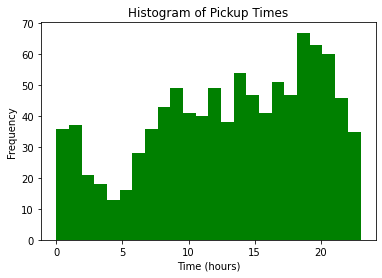

In [31]:
# Most Popular Pick up times & how it correlates to price (plot, basic stats dataframe) -Neil 
#Convert pickup_datetime to datetime object
uber_df_cleaned["pickup_datetime"] = pd.to_datetime(uber_df_cleaned["pickup_datetime"])

#Extract time from datetime object
uber_df_cleaned["pickup_hour"] = uber_df_cleaned.loc[:,"pickup_datetime"].dt.hour




#Generate summary stats, histogram
t=uber_df_cleaned["pickup_hour"]
t_mean = uber_df_cleaned["pickup_hour"].mean() 
t_med = uber_df_cleaned["pickup_hour"].median()
t_mode = uber_df_cleaned["pickup_hour"].mode()
t_corr = t.corr(uber_df_cleaned["fare_amount"], method='pearson')
t_df = pd.DataFrame({"Mean Pickup Time (hours)":t_mean,
                    "Median Pickup Time (hours)":t_med,
                    "Modal Pickup Time (hours)":t_mode,
                   "Correlation between time and fare":t_corr})


plt.hist(t, bins=24, range =(t.min(), t.max()), color='green')
plt.ylabel("Frequency")
plt.xlabel("Time (hours)")
plt.title("Histogram of Pickup Times")
t_df


Text(0.5, 1.0, ' Scatter Plot')

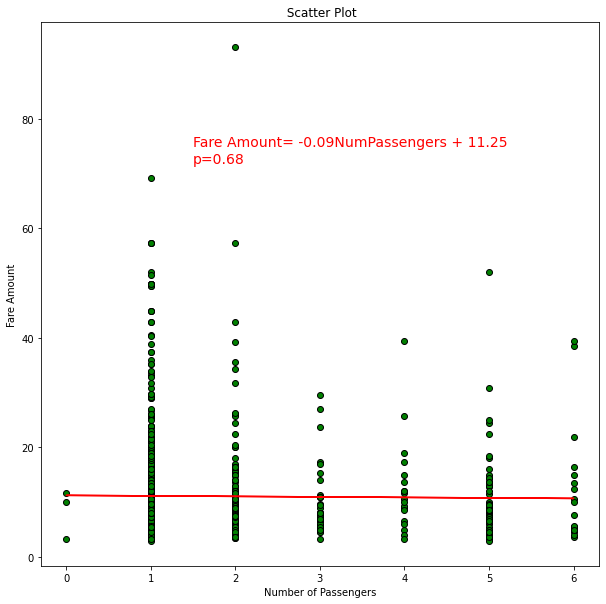

In [32]:
# Price regression on number of passengers (plot, stats)- Neil 
y1 = uber_df_cleaned["fare_amount"]
x1 = uber_df_cleaned["passenger_count"]

#Generate Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x1, y1)
regress_values = slope*x1 + intercept
r_squared = rvalue**2
line_eq = "Fare Amount= " + str(round(slope,2)) + "NumPassengers + " + str(round(intercept,2))


#Generate Plot
plt.scatter(x1,y1, facecolors="green", edgecolors="black")
plt.gcf().set_size_inches(10, 10)
plt.annotate(line_eq,xy=(1.5,75),fontsize=14,color="red")
plt.annotate(f"p={round(pvalue,2)}",xy=(1.5,72),xycoords='data',fontsize=14,color="red")
plt.plot(x1,regress_values,"r-")
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount")
plt.title(" Scatter Plot")

#what about per person?